# Objective

## Project Objective

The goal of this project is to analyze customer data to identify behavioral and demographic patterns associated with churn — defined as the cancellation of service. Based on these patterns, a machine learning model will be developed to accurately predict whether a customer is likely to churn. 

This prediction model will support customer retention strategies by enabling the business to take proactive actions toward high-risk customers.

### Project Steps:
1. Exploratory data analysis (EDA)
2. Feature engineering 
3. Model training and evaluation (classification)
4. Model interpretation and business recommendations

### Evaluation Metrics:
- Precision, Recall, F1-score
- AUC-ROC
- Business impact (e.g., estimated revenue preserved)



# 0.0 Imports and Load Data

## 0.1  Imports and Preparation

In [42]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
# Paleta de cores utilizada
custom_palette = ["#003F7E", "#027902", "#A00028", "#3D231E"]
sns.set_palette(custom_palette)
sns.color_palette(custom_palette)

[(0.0, 0.24705882352941178, 0.49411764705882355),
 (0.00784313725490196, 0.4745098039215686, 0.00784313725490196),
 (0.6274509803921569, 0.0, 0.1568627450980392),
 (0.23921568627450981, 0.13725490196078433, 0.11764705882352941)]

# 0.2 Load and split data

In [44]:
# dataset link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn or https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
df_raw = pd.read_csv("../data/raw/Telco_Customer_Churn.csv")
df_raw.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [45]:
X = df_raw.drop(columns='Churn')  # Features
y = df_raw['Churn']               # Target

X['TotalCharges'] = X['TotalCharges'].replace(" ", 0).astype(float)

# Divisão em treino e teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df1 = pd.concat([X_train, y_train], axis=1)

# 1.0 EDA

## Data Dictionary – Selected Customer Fields

| Column              | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| CustomerID          | A unique identifier for each customer.                                      |
| Gender              | The customer's gender: Male or Female.                                      |
| SeniorCitizen       | Indicates if the customer is 65 or older: 1 = Yes, 0 = No.                  |
| Partner             | Indicates if the customer has a partner: Yes or No.                         |
| Dependents          | Indicates if the customer has dependents living with them: Yes or No.       |
| tenure              | Number of months the customer has been with the company.                    |
| PhoneService        | Indicates if the customer has home phone service: Yes or No.                |
| MultipleLines       | Indicates if the customer has multiple phone lines: Yes, No, No phone service. |
| InternetService     | Type of internet service: DSL, Fiber optic, Cable, or No.                   |
| OnlineSecurity      | Indicates if the customer subscribes to online security: Yes, No, or No internet service. |
| OnlineBackup        | Indicates if the customer subscribes to online backup: Yes, No, or No internet service. |
| DeviceProtection    | Indicates if the customer subscribes to device protection: Yes, No, or No internet service. |
| TechSupport         | Indicates if the customer subscribes to tech support: Yes, No, or No internet service. |
| StreamingTV         | Indicates if the customer streams TV using the internet: Yes, No, or No internet service. |
| StreamingMovies     | Indicates if the customer streams movies using the internet: Yes, No, or No internet service. |
| Contract            | The type of contract: Month-to-month, One year, or Two year.                |
| PaperlessBilling    | Indicates if the customer uses paperless billing: Yes or No.                |
| PaymentMethod       | How the customer pays: Electronic check, Mailed check, Bank transfer, or Credit card. |
| MonthlyCharges      | The customer’s current monthly bill amount.                                |
| TotalCharges        | The total amount billed to the customer to date.                            |
| Churn               | Indicates if the customer has churned: Yes or No.                           |


## 1.1 Data Info

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3738 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 
 1

## 1.2 Feature Analysis

### 1.2.1 Numeric Features

In [47]:
# Select numerical features
df_numbers = df1.select_dtypes(include=['int64', 'float64']).drop(columns=['SeniorCitizen'])
df_numbers.head(3)

,tenure,MonthlyCharges,TotalCharges
3738,35,49.20,1701.65
3151,15,75.10,1151.55
4860,13,40.55,590.35


In [48]:
df_numbers.describe().T		

,count,mean,std,min,25%,50%,75%,max
tenure,5634.0,32.485091,24.568744,0.0,9.0000,29.000,55.000,72.00
MonthlyCharges,5634.0,64.929961,30.138105,18.4,35.6625,70.500,90.000,118.75
TotalCharges,5634.0,2299.334682,2279.204278,0.0,402.9750,1394.925,3835.825,8684.80


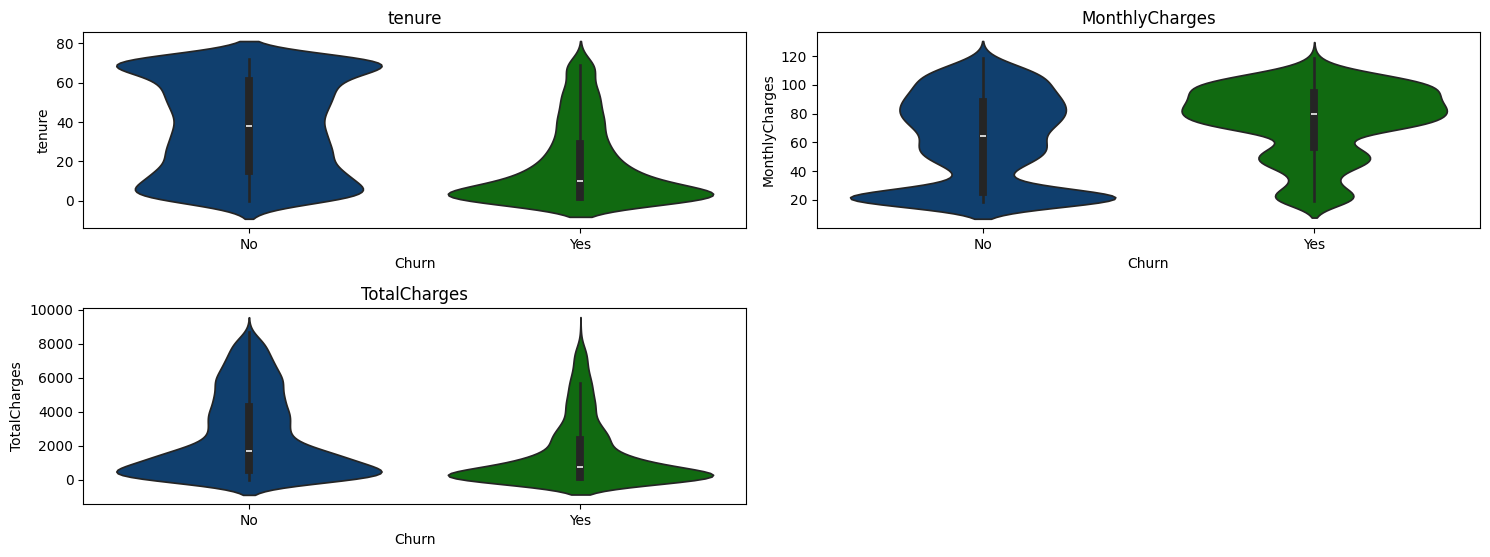

In [49]:
plt.figure(figsize=(15, 8))
for n, coluna in enumerate(df_numbers.columns, start=1):
	plt.subplot(3, 2, n)
	sns.violinplot(data=df1, x='Churn', y=coluna, hue= 'Churn')
	plt.title(coluna)
	plt.tight_layout()

- Customers with shorter tenure are more likely to churn, while customers with longer tenure tend to be more loyal.
- Higher monthly charges are associated with increased churn, indicating that elevated costs may be a dissatisfaction factor.

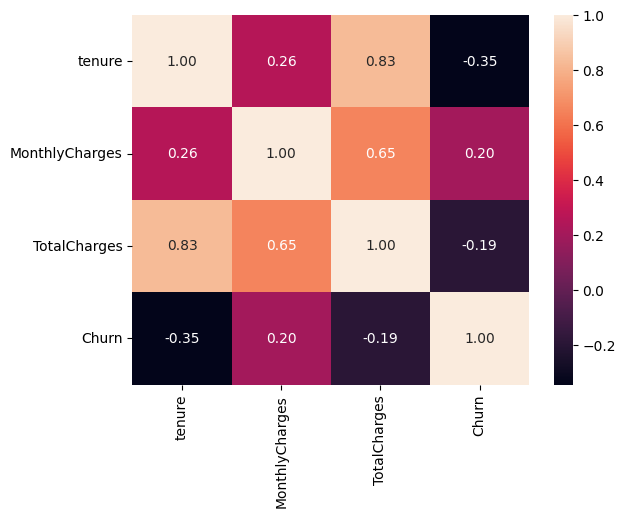

In [50]:
df_numbers['Churn'] = df1['Churn'].map({'Yes': 1, 'No': 0})
correlacoes = df_numbers.corr()
sns.heatmap(correlacoes, annot=True, fmt=".2f", );

- Tenure vs Churn: There is a negative correlation (-0.35), indicating that customers with longer tenure are less likely to churn.
- MonthlyCharges vs Churn: The positive correlation (0.20) suggests that higher monthly charges increase the likelihood of churn.

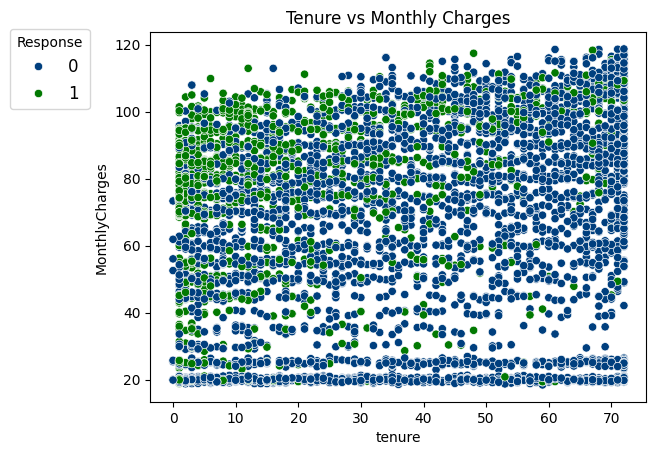

In [51]:
sns.scatterplot(data=df_numbers, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Tenure vs Monthly Charges')
plt.legend(
	title="Response",
	title_fontsize=10, fontsize=12, 
	loc="center left",
	bbox_to_anchor=(-0.3, 0.9));

- Customers with low tenure and high monthly charges have a higher concentration of churn (green dots).
- Customers with longer tenure (right side of the plot) are mostly non-churn (blue dots), regardless of monthly charges.
- Churn is less frequent among customers with both high tenure and low monthly charges.

### 1.2.2 Object Features

In [52]:
df_obj = df1.select_dtypes(include=['object']).drop(columns=['customerID'])
df_obj.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
3738,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,No
3151,Male,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No
4860,Male,Yes,Yes,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,No


In [53]:
df_obj['SeniorCitizen'] = df1['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
df_obj.describe().T

,count,unique,top,freq
gender,5634,2,Male,2833
Partner,5634,2,No,2905
Dependents,5634,2,No,3955
PhoneService,5634,2,Yes,5075
MultipleLines,5634,3,No,2685
InternetService,5634,3,Fiber optic,2483
OnlineSecurity,5634,3,No,2797
OnlineBackup,5634,3,No,2442
DeviceProtection,5634,3,No,2472
TechSupport,5634,3,No,2771


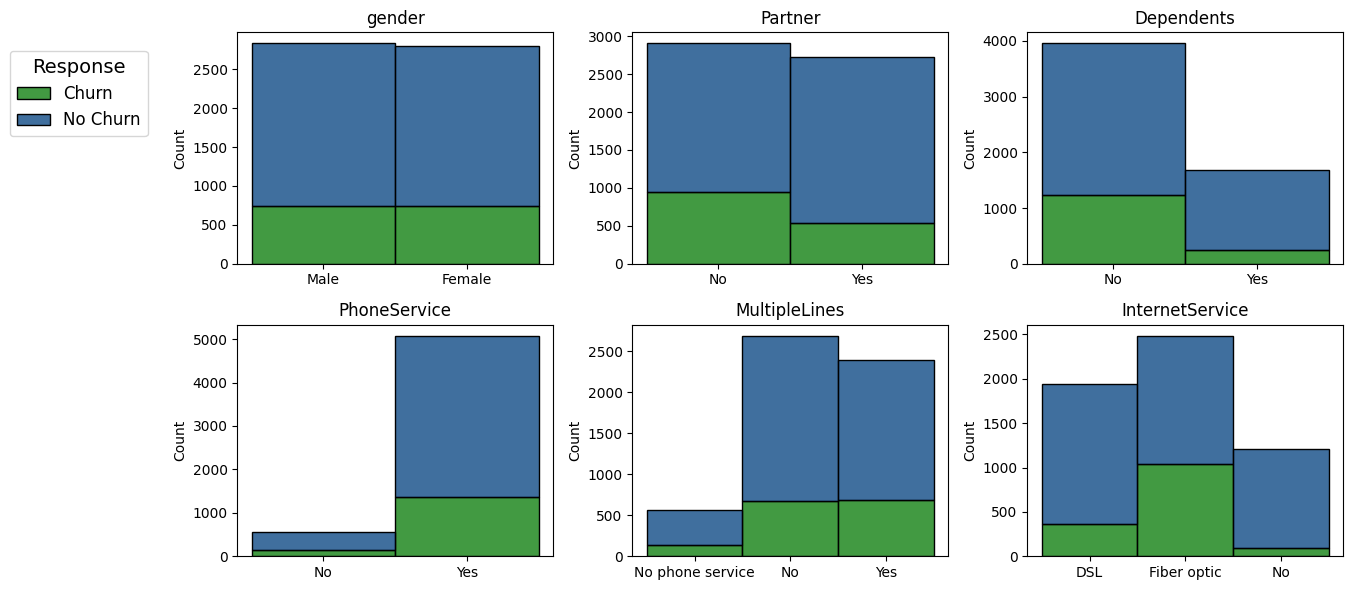

In [54]:
df_obj1 = df_obj.iloc[:, 0:6].copy()
df_obj2 = df_obj.iloc[:, 6:12].copy()
df_obj3 = df_obj.iloc[:, 12:18].copy()

plt.figure(figsize=(12, 6))
for n, coluna in enumerate(df_obj1.columns, start=1): 
	plt.subplot(2, 3, n)
	sns.histplot(data=df_obj1, x=coluna, hue=df_obj['Churn'],multiple="stack")
	plt.title(coluna)
	plt.xlabel('')
	plt.legend([], frameon=False)
	plt.tight_layout()
plt.legend(
	title="Response",
	title_fontsize=14, fontsize=12, 
	labels=['Churn','No Churn'], 
	loc="center left",
	bbox_to_anchor=(-3.25, 2));

- Partner: Customers without a partner have a higher churn rate compared to those with a partner.
- Dependents: Customers without dependents have a much higher churn rate than those with dependents.
- PhoneService: Most customers have phone service, so churn is concentrated among those who have it.
- InternetService: Customers with fiber optic internet have a higher churn rate compared to those with DSL or no internet service.

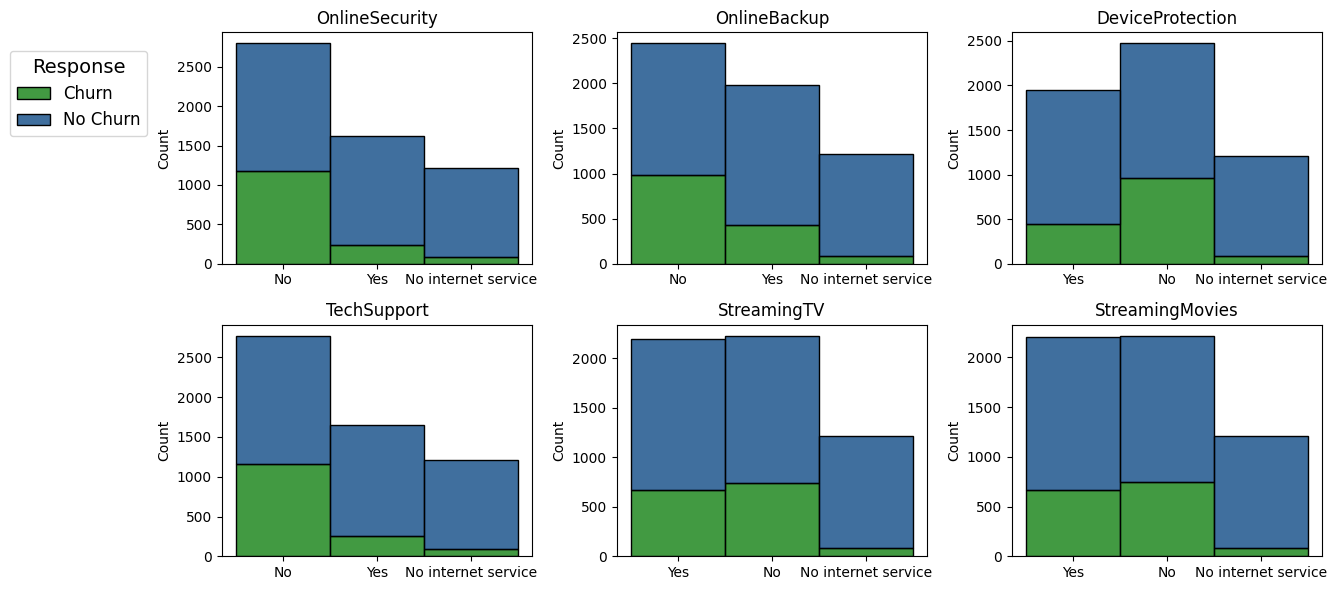

In [55]:
plt.figure(figsize=(12, 6))
for n, coluna in enumerate(df_obj2.columns, start=1): 
	plt.subplot(2, 3, n)
	sns.histplot(data=df_obj2, x=coluna, hue=df_obj['Churn'],multiple="stack")
	plt.title(coluna)
	plt.xlabel('')
	plt.legend([], frameon=False)
	plt.tight_layout()
plt.legend(
	title="Response",
	title_fontsize=14, fontsize=12, 
	labels=['Churn','No Churn'],
	loc="center left",
	bbox_to_anchor=(-3.25, 2));



- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:
  Customers without these services have a significantly higher churn rate. In other words, the absence of these services is associated with a greater risk of cancellation.

- StreamingTV and StreamingMovies: 
  There is no clear difference in churn between customers who use these services and those who do not. Churn is similarly distributed among both groups.

- No internet service:  
  Customers without internet service have lower churn rates, probably because they represent a smaller or less relevant group for the core business.

Summary:
The lack of security, backup, device protection, and technical support services is strongly associated with churn. Retention strategies can focus on encouraging customers to subscribe to these services to reduce the risk of cancellation.

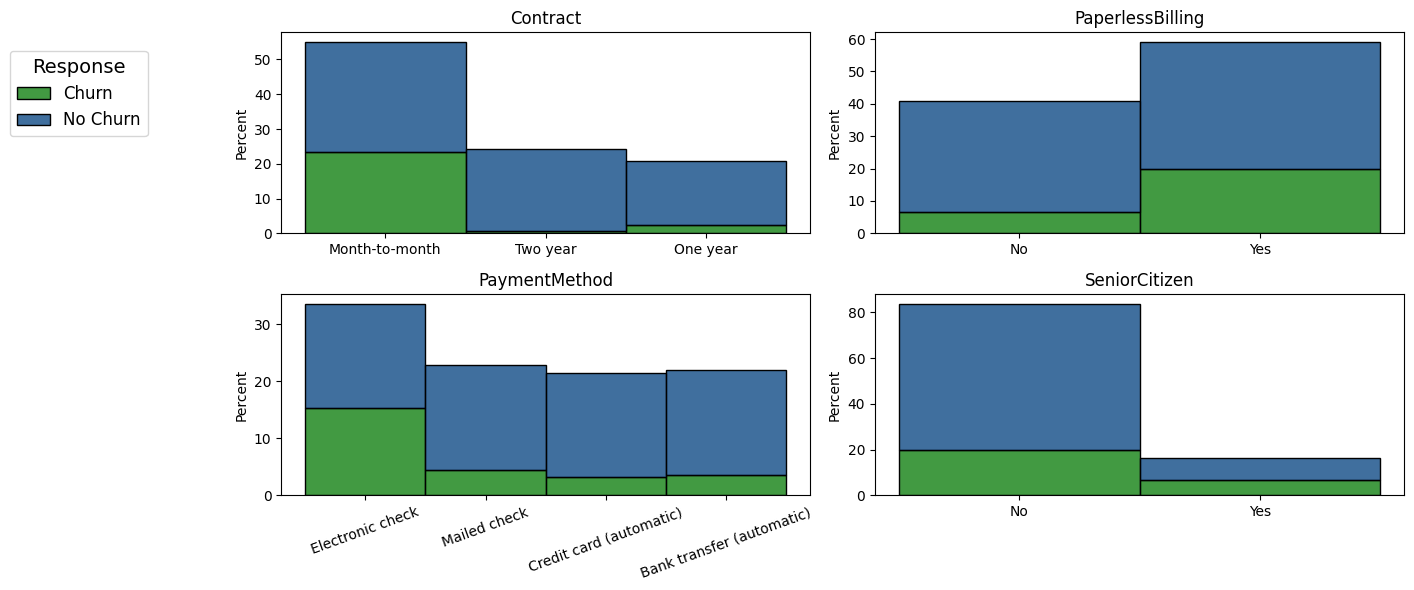

In [56]:
plt.figure(figsize=(12, 6))
for n, coluna in enumerate(df_obj3.drop('Churn', axis=1).columns, start=1):
    plt.subplot(2, 2, n)
    ax = sns.histplot(data=df_obj3, x=coluna, hue=df_obj['Churn'], multiple="stack", stat="percent")
    plt.title(coluna)
    plt.xlabel('')
    if n == 3:
        plt.xticks(rotation=20)
    plt.legend([], frameon=False)
    plt.tight_layout()

plt.legend(
    title="Response",
    title_fontsize=14, fontsize=12,
    labels=['Churn', 'No Churn'],
    loc="center left",
    bbox_to_anchor=(-1.65, 2)
);

- Contract: Customers with month-to-month contracts have a much higher churn rate compared to those with one or two-year contracts. Longer contracts are associated with higher retention.
- PaperlessBilling: Customers who use paperless billing ("Yes") have a higher churn rate than those who do not.
- PaymentMethod: The "Electronic check" payment method is associated with a higher churn rate, while automatic methods (credit card, bank transfer) show lower churn rates.
- SeniorCitizen: Elderly customers ("Yes") have a higher churn rate compared to non-elderly customers.

General Conclusion:
Customers with month-to-month contracts, who use paperless billing, pay via "Electronic check," and are elderly are more likely to cancel the service. Retention strategies can be targeted at these groups by offering benefits for longer contracts, encouraging automatic payment methods, and personalizing offers for elderly customers.

# 2.0 Feature Engeneering

In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



In [58]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Columns for Target Encoding (usually categorical features with many categories or an implicit order)
target_encode_features = ['Contract', 'InternetService', 'PaymentMethod']

# Columns for One-Hot Encoding 
onehot_encode_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                          'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'SeniorCitizen']



In [59]:
x = df1.drop(['Churn','customerID'], axis=1)
y = df1['Churn']
y_encoded = y.map({'Yes': 1, 'No': 0})

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), onehot_encode_features),
        ('te', TargetEncoder(), target_encode_features)
    ],
)

In [61]:
# testing preprocessor
df_transform = preprocessor.fit_transform(x, y_encoded)
df_transform = pd.DataFrame(df_transform, columns=preprocessor.get_feature_names_out())
df_transform.head(3)

,num__tenure,num__MonthlyCharges,num__TotalCharges,ohe__gender_Female,ohe__gender_Male,ohe__Partner_No,ohe__Partner_Yes,ohe__Dependents_No,ohe__Dependents_Yes,ohe__PhoneService_No,...,ohe__StreamingMovies_No,ohe__StreamingMovies_No internet service,ohe__StreamingMovies_Yes,ohe__PaperlessBilling_No,ohe__PaperlessBilling_Yes,ohe__SeniorCitizen_0,ohe__SeniorCitizen_1,te__Contract,te__InternetService,te__PaymentMethod
0,0.102371,-0.521976,-0.262257,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.427466,0.186887,0.457430
1,-0.711743,0.337478,-0.503635,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.427466,0.420862,0.192846
2,-0.793155,-0.809013,-0.749883,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.028698,0.186887,0.192846


# 3.0 Modeling 

In [62]:
from auxiliar_functions import perform_grid_search

In [63]:
y_test_encoded = y_test.map({'Yes': 1, 'No': 0})

## 3.1 Logistic Regression

### 3.1.1 Hiperparameter Fine Tuning

In [ ]:
# Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'classifier__class_weight': [ 'balanced'],
    'classifier__max_iter': [100, 500, 1000, 1500, 2000],
}

# Use the perform_grid_search function
best_params, best_score, best_model = perform_grid_search(
    pipeline=model_pipeline,
    param_grid=param_grid,
    X=x, 
    y=y_encoded,
    scoring='recall',
    cv=5
)

# Evaluate the best model on the same dataset
y_pred = best_model.predict(x)
print(classification_report(y_encoded, y_pred, target_names=['No Churn', 'Churn']))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Melhores parâmetros: {'classifier__class_weight': 'balanced', 'classifier__max_iter': 100}
Melhor recall: 0.7980
              precision    recall  f1-score   support

    No Churn       0.91      0.74      0.82      4139
       Churn       0.53      0.80      0.63      1495

    accuracy                           0.76      5634
   macro avg       0.72      0.77      0.73      5634
weighted avg       0.81      0.76      0.77      5634



In [ ]:
# Final Pipenline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(solver='liblinear', max_iter=100, class_weight='balanced', random_state=42))])



### 3.1.2 Test data

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.73      0.81      1035
       Churn       0.51      0.79      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



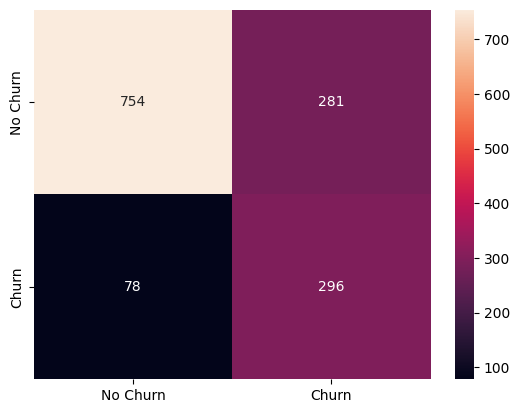

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict to test dataset 
y_test_pred = best_model.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=['No Churn', 'Churn']))

sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred), annot=True, fmt='d', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn']);	

## 3.2 Random Forest 

## 3.3 Gradient Boosting